# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [335]:
import pandas as pd

In [336]:
df=pd.read_csv("students-data.csv",delimiter=';')

In [337]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [338]:
df.index.name='Number'

In [339]:
df.isnull().values.any()

False

In [340]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [341]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [342]:
df.select_dtypes(exclude='int64').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [343]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [344]:
df_low_var=df.select_dtypes(include='int64').loc[:, df.var()<1]

In [345]:
df_new=df.drop(columns=df_low_var.columns)

In [346]:
df_new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19


# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [347]:
df_new.select_dtypes(exclude='int64').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [348]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df_new.apply(le.fit_transform)

# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [349]:
df['G1']>10

Number
0      False
1      False
2      False
3       True
4      False
5       True
6      False
7      False
8       True
9       True
10     False
11     False
12      True
13     False
14      True
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
365    False
366    False
367    False
368    False
369     True
370    False
371     True
372    False
373    False
374     True
375    False
376     True
377    False
378     True
379    False
380     True
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391     True
392    False
393    False
394    False
Name: G1, Length: 395, dtype: bool

In [350]:
df["G1"]=df["G1"].map(lambda X: 1 if X>=10 else 0)


In [351]:
df["G2"]=df["G2"].map(lambda X: 1 if X>=10 else 0)

In [352]:
df["G3"]=df["G3"].map(lambda X: 1 if X>=10 else 0)

# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [354]:
Y=df['G3']

In [355]:
X=df.drop(columns='G3')

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(300, 26) (95, 26) (300,) (95,)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [360]:
from sklearn.linear_model import LogisticRegression

In [361]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Prasanna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [362]:
y_pred=lr.predict(x_test)

In [363]:
test_score=lr.score(x_test,y_test)

In [364]:
train_score=lr.score(x_train,y_train)

In [365]:
print(test_score,train_score)

0.9473684210526315 0.9566666666666667


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [366]:
print(lr.coef_)

[[-0.1416856  -0.17093289 -0.13372977  0.06390599  0.2202673   0.2656863
   0.45975247 -0.28505963 -0.06361709 -0.41924451  0.02892304 -0.31026065
  -0.96879296 -0.42487476 -0.07364546 -0.37022405  0.3284389  -0.33270753
  -0.23854071 -0.25152361 -0.07999449 -0.23916741 -0.08941477  0.03450488
   1.8102088   4.0770849 ]]


In [367]:
print(lr.intercept_)

[-0.79753857]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [368]:
lr.coef_.max()

4.07708489534458

In [369]:
data_colms=X.columns

In [370]:
data_colms

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [371]:
lr.coef_

array([[-0.1416856 , -0.17093289, -0.13372977,  0.06390599,  0.2202673 ,
         0.2656863 ,  0.45975247, -0.28505963, -0.06361709, -0.41924451,
         0.02892304, -0.31026065, -0.96879296, -0.42487476, -0.07364546,
        -0.37022405,  0.3284389 , -0.33270753, -0.23854071, -0.25152361,
        -0.07999449, -0.23916741, -0.08941477,  0.03450488,  1.8102088 ,
         4.0770849 ]])

In [372]:
import numpy as np

In [373]:
coeff_df=pd.DataFrame(lr.coef_,columns=data_colms)

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [400]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

#Acur_score=lr.score(y_pred_train,y_pred_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [ ]:
df_dtree=pd.read_csv('bc2.csv')

In [ ]:
df_dtree

### Observe the no.of records in dataset and type of each feature 

In [ ]:
df_dtree.dtypes

In [ ]:
df_dtree.describe()

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [ ]:
df_dtree.isnull().sum()
#No missing values from above code

In [ ]:
import matplotlib.pyplot as plt
 
%matplotlib inline
import seaborn as sns

When we check the outliers for numeric variables we got the below columns
having outliers:
1)Marginal Adhesion
2)Single Epithelial Cell Size
3)Normal Nucleoli
4)Bland Chromatin
Plotted the boxplot to check outliers as below

In [ ]:
sns.boxplot(df_dtree['Bland Chromatin'])


### Check Missing Values

In [ ]:
df_dtree.isnull().sum()
#No missing values from above code

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.


#### Check include='all' parameter in describe function

In [279]:
#Number of rows having ? in Bare Nuclei feature
len(df_dtree[df_dtree['Bare Nuclei']=='?'])

16

In [283]:
top=df_dtree['Bare Nuclei'].describe(include='all').top

In [287]:
top=int(top)

In [289]:
df_dtree['Bare Nuclei']=df_dtree['Bare Nuclei'].map(lambda X: top if X=='?' else X )

### Print and plot the distribution of target variable (Class - using Histogram) 

(array([458.,   0.,   0., 241.]),
 array([2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 4 Patch objects>)

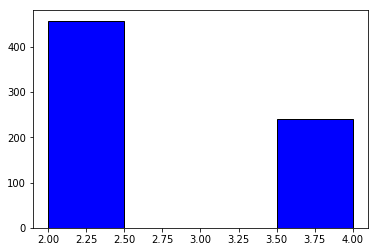

In [297]:
plt.hist(df_dtree['Class'], color = 'blue', edgecolor = 'black',
         bins = 4)

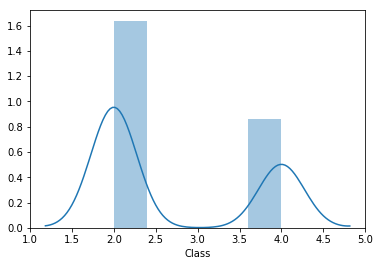

In [298]:
sns.distplot(df_dtree['Class'])

### convert the datatype of Bare Nuclei to `int`

In [305]:
df_dtree['Bare Nuclei']=df_dtree['Bare Nuclei'].astype('int64')

### Standardization of Data (Use Standard Scaler)

In [ ]:
from scipy.stats import zscore
df_z = df_dtree.apply(zscore)
df_z

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\Prasanna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prasanna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


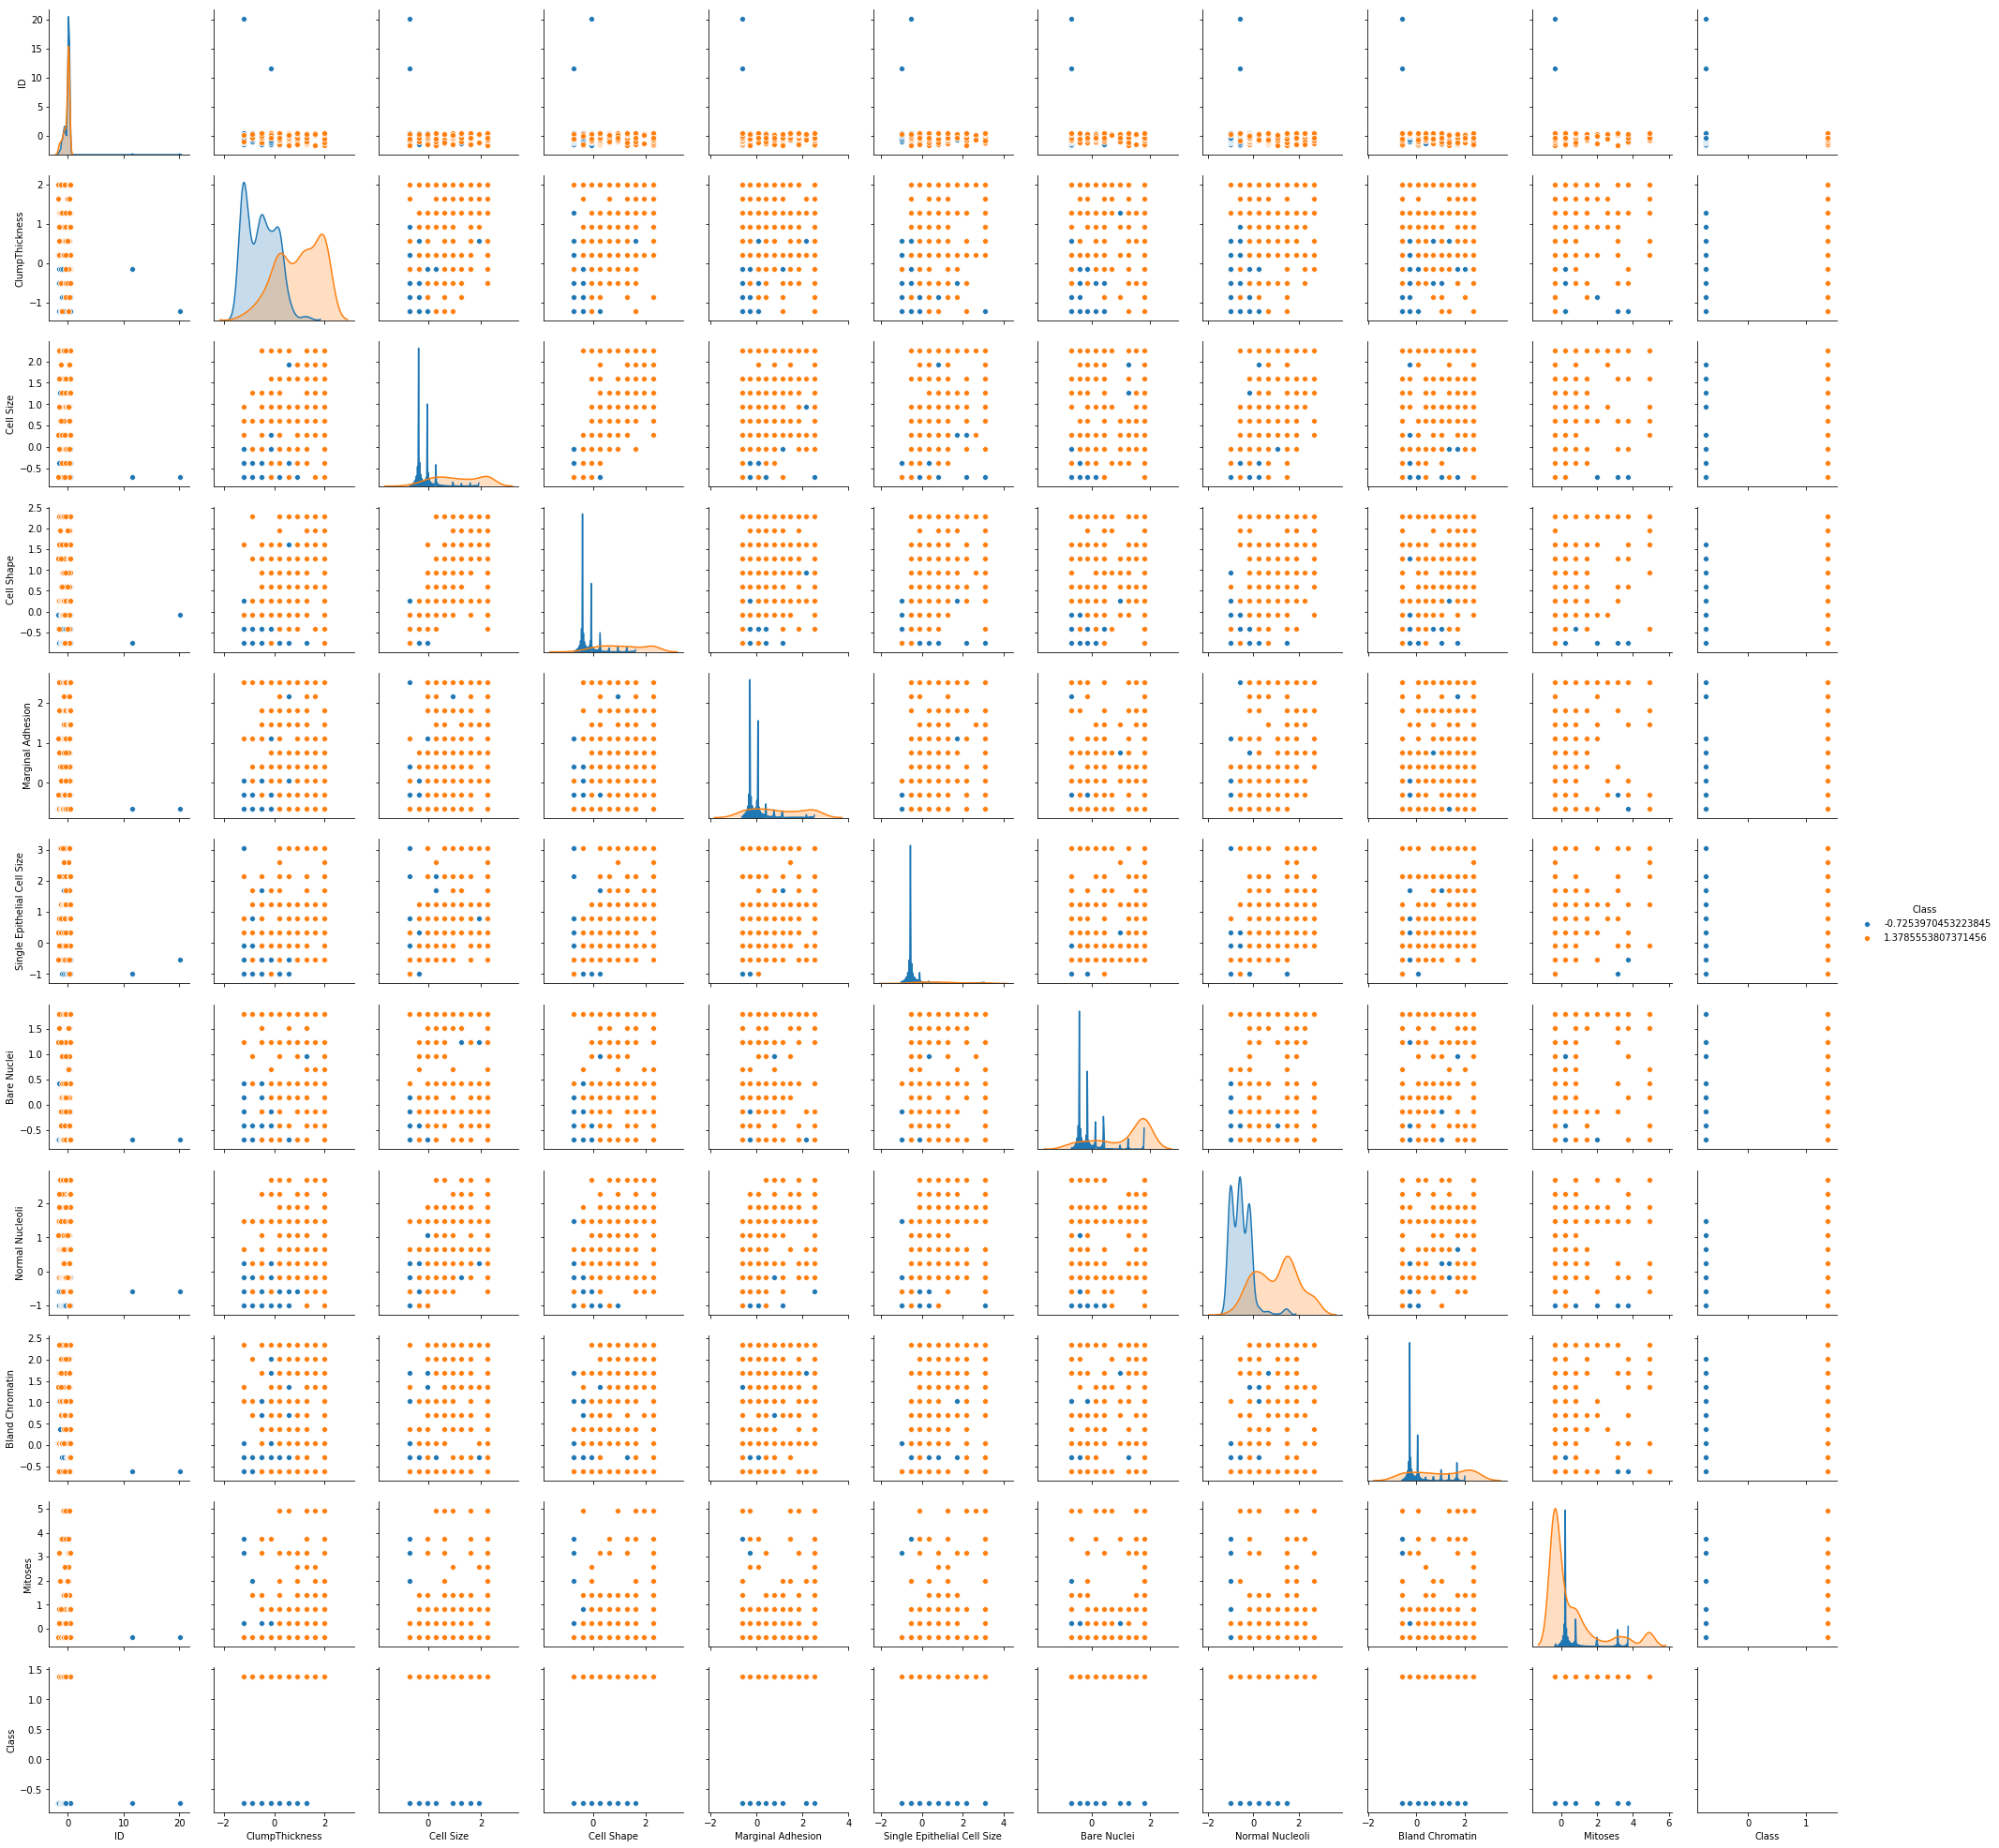

In [313]:
sns.pairplot(df_z,hue='Class')

### Divide the dataset into feature set and target set

In [323]:
X = df_dtree.drop("Class" , axis=1)

Y = df_dtree.pop("Class")

### Divide the Training and Test sets in 70:30 

In [324]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)


### Model 1 : Implement a default Decision Tree model with no attributes

In [326]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [327]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                                  Imp
ID                           0.034260
ClumpThickness               0.037918
Cell Size                    0.686641
Cell Shape                   0.019776
Marginal Adhesion            0.026789
Single Epithelial Cell Size  0.026607
Bare Nuclei                  0.151578
Normal Nucleoli              0.007618
Bland Chromatin              0.008813
Mitoses                      0.000000


### Check the training & test accuracy of model 1 

In [328]:
y_predict = dt_model.predict(test_set)

In [329]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.9333333333333333


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [330]:

reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,max_leaf_nodes=5)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [332]:
y_predict_reg = reg_dt_model.predict(test_set)
print(reg_dt_model.score(train_set , train_labels))
print(reg_dt_model.score(test_set , test_labels))

0.9591002044989775
0.9333333333333333


### Print the confusion matrix of model 1 and model 2

In [334]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, y_predict_reg))

[[133   4]
 [ 10  63]]
